In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from CCplot import auto_plot_style
from CCplot import set_ylimits

In [2]:
pd.set_option('display.max_columns', 500)

auto_plot_style()

In [3]:
n_per_fission  = 3.7
g_per_fission  = 8.3
Cf_t_activity  = 8.9e6                         # fissions/s
Cf_n_activity  = Cf_t_activity * n_per_fission # n/s
Cf_g_activity  = Cf_t_activity * g_per_fission # g/s
long_exposure  = (12 * 24 - 2 - 1.5) * 3600    # s
short_exposure = ( 5 * 24 + 4      ) * 3600    # s

In [4]:
long_exposure / short_exposure

2.2943548387096775

In [5]:
sim                    = pd.read_csv("Californication_sim_data.txt", sep=" ")
sim["n_flux"         ] = sim.n_rel_fluence * Cf_t_activity
sim["em_eflux"       ] = sim.em_dose       * Cf_t_activity * 1e3
sim["n_fluence_short"] = sim.n_flux * short_exposure
sim["n_fluence_long" ] = sim.n_flux *  long_exposure
sim["ng_ratio"       ] = sim.n_flux / sim.em_eflux / 3e2

# All data

In [6]:
sim

crystal position  n_rel_fluence       em_dose  ratio/300000       n_flux  \
0      SP1     near       0.000819  2.727677e-09      1.000984  7290.061414   
1      SP2     near       0.000883  2.849215e-09      1.033169  7859.732009   
2      SP3     near       0.000933  2.974238e-09      1.046023  8306.690615   
3      SP4      far       0.000244  2.595477e-09      0.313676  2173.753847   
4      SP5      far       0.000245  2.586986e-09      0.315049  2176.124695   
5      QZ1     near       0.000823  2.958587e-09      0.926778  7321.012047   
6      QZ3     near       0.000927  3.200854e-09      0.965203  8248.890425   
7      QZ2     near       0.000873  3.392497e-09      0.857535  7767.521194   
8      QZ4     near       0.000873  3.225642e-09      0.902429  7772.135139   
9      QZ5      far       0.000242  2.302627e-09      0.350096  2152.395938   
10     QZ6      far       0.000245  2.952973e-09      0.276000  2176.105579   
11    BaF1     near       0.000700  2.806735e-09      0.831896  6234.215084   
12    BaF2     near       0.000737  2.844160e-09      0.863513  6557.434566   
13    BaF3     near       0.000773  3.234702e-09      0.796740  6881.166916   
14    BaF4      far       0.000222  2.520441e-09      0.293351  1974.125456   
15    BaF5      far       0.000218  2.179275e-09      0.332685  1935.779854   
16    CaF1     near       0.000625  2.434746e-09      0.855850  5563.682062   
17    CaF2     near       0.000669  2.546500e-09      0.875743  5954.313807   
18    CaF3     near       0.000715  2.678793e-09      0.889117  6359.299320   
19    CaF4      far       0.000191  2.238400e-09      0.283831  1696.325771   
20    CaF5      far       0.000193  2.430107e-09      0.265094  1720.035412   

     em_eflux  n_fluence_short  n_fluence_long  ng_ratio  
0   24.276325     3.254283e+09    7.466481e+09  1.000984  
1   25.358013     3.508584e+09    8.049938e+09  1.033169  
2   26.470718     3.708107e+09    8.507713e+09  1.046023  
3   23.099745     9.703637e+08    2.226359e+09  0.313676  
4   23.024176     9.714221e+08    2.228787e+09  0.315049  
5   26.331426     3.268100e+09    7.498181e+09  0.926778  
6   28.487597     3.682305e+09    8.448514e+09  0.965203  
7   30.193221     3.467421e+09    7.955495e+09  0.857535  
8   28.708216     3.469481e+09    7.960221e+09  0.902429  
9   20.493383     9.608295e+08    2.204484e+09  0.350096  
10  26.281458     9.714135e+08    2.228767e+09  0.276000  
11  24.979944     2.782954e+09    6.385083e+09  0.831896  
12  25.313022     2.927239e+09    6.716124e+09  0.863513  
13  28.788852     3.071753e+09    7.047691e+09  0.796740  
14  22.431923     8.812496e+08    2.021899e+09  0.293351  
15  19.395550     8.641321e+08    1.982626e+09  0.332685  
16  21.669236     2.483628e+09    5.698323e+09  0.855850  
17  22.663850     2.658006e+09    6.098408e+09  0.875743  
18  23.841256     2.838791e+09    6.513194e+09  0.889117  
19  19.921761     7.572398e+08    1.737377e+09  0.283831  
20  21.627954     7.678238e+08    1.761660e+09  0.265094

# Neutron flux ratios

In [7]:
# cell i,j means flux[i] / flux[j]
pd.DataFrame(sim.n_flux.values[:, np.newaxis] / sim.n_flux.values, index=sim.crystal, columns=sim.crystal)

crystal       SP1       SP2       SP3       SP4       SP5       QZ1       QZ3  \
crystal                                                                         
SP1      1.000000  0.927520  0.877613  3.353674  3.350020  0.995772  0.883763   
SP2      1.078143  1.000000  0.946193  3.615742  3.611802  1.073585  0.952823   
SP3      1.139454  1.056867  1.000000  3.821358  3.817194  1.134637  1.007007   
SP4      0.298180  0.276568  0.261687  1.000000  0.998911  0.296920  0.263521   
SP5      0.298506  0.276870  0.261973  1.001091  1.000000  0.297244  0.263808   
QZ1      1.004246  0.931458  0.881339  3.367912  3.364243  1.000000  0.887515   
QZ3      1.131526  1.049513  0.993042  3.794767  3.790633  1.126742  1.000000   
QZ2      1.065495  0.988268  0.935092  3.573321  3.569428  1.060990  0.941644   
QZ4      1.066128  0.988855  0.935648  3.575444  3.571549  1.061620  0.942204   
QZ5      0.295251  0.273851  0.259116  0.990175  0.989096  0.294003  0.260932   
QZ6      0.298503  0.276868  0.261970  1.001082  0.999991  0.297241  0.263806   
BaF1     0.855166  0.793184  0.750505  2.867949  2.864824  0.851551  0.755764   
BaF2     0.899503  0.834308  0.789416  3.016641  3.013354  0.895701  0.794947   
BaF3     0.943911  0.875496  0.828388  3.165569  3.162120  0.939920  0.834193   
BaF4     0.270797  0.251170  0.237655  0.908164  0.907175  0.269652  0.239320   
BaF5     0.265537  0.246291  0.233039  0.890524  0.889554  0.264414  0.234672   
CaF1     0.763187  0.707872  0.669783  2.559481  2.556693  0.759961  0.674476   
CaF2     0.816771  0.757572  0.716809  2.739185  2.736201  0.813318  0.721832   
CaF3     0.872325  0.809099  0.765564  2.925492  2.922305  0.868637  0.770928   
CaF4     0.232690  0.215825  0.204212  0.780367  0.779517  0.231706  0.205643   
CaF5     0.235943  0.218841  0.207066  0.791274  0.790412  0.234945  0.208517   

crystal       QZ2       QZ4       QZ5       QZ6      BaF1      BaF2      BaF3  \
crystal                                                                         
SP1      0.938531  0.937974  3.386952  3.350050  1.169363  1.111725  1.059422   
SP2      1.011871  1.011271  3.651620  3.611834  1.260741  1.198599  1.142209   
SP3      1.069413  1.068778  3.859276  3.817228  1.332436  1.266759  1.207163   
SP4      0.279852  0.279686  1.009923  0.998919  0.348681  0.331495  0.315899   
SP5      0.280157  0.279991  1.011024  1.000009  0.349062  0.331856  0.316244   
QZ1      0.942516  0.941956  3.401331  3.364272  1.174328  1.116445  1.063920   
QZ3      1.061972  1.061342  3.832422  3.790666  1.323164  1.257945  1.198763   
QZ2      1.000000  0.999406  3.608779  3.569460  1.245950  1.184537  1.128809   
QZ4      1.000594  1.000000  3.610923  3.571580  1.246690  1.185240  1.129479   
QZ5      0.277102  0.276938  1.000000  0.989105  0.345255  0.328238  0.312795   
QZ6      0.280154  0.279988  1.011015  1.000000  0.349058  0.331853  0.316241   
BaF1     0.802600  0.802124  2.896407  2.864850  1.000000  0.950709  0.905982   
BaF2     0.844212  0.843711  3.046574  3.013381  1.051846  1.000000  0.952954   
BaF3     0.885890  0.885364  3.196980  3.162148  1.103774  1.049369  1.000000   
BaF4     0.254151  0.254000  0.917176  0.907183  0.316660  0.301051  0.286888   
BaF5     0.249215  0.249067  0.899360  0.889562  0.310509  0.295204  0.281316   
CaF1     0.716275  0.715850  2.584879  2.556715  0.892443  0.848454  0.808538   
CaF2     0.766566  0.766110  2.766365  2.736225  0.955102  0.908025  0.865306   
CaF3     0.818704  0.818218  2.954521  2.922330  1.020064  0.969785  0.924160   
CaF4     0.218387  0.218257  0.788110  0.779524  0.272099  0.258687  0.246517   
CaF5     0.221439  0.221308  0.799126  0.790419  0.275902  0.262303  0.249963   

crystal      BaF4      BaF5      CaF1      CaF2      CaF3      CaF4      CaF5  
crystal                                                                        
SP1      3.692806  3.765956  1.310294  1.224333  1.146362  4.297560  4.238321  
SP2      3.981374  4.060241  1.4

# $\gamma$ flux ratios

In [8]:
# cell i,j means flux[i] / flux[j]
pd.DataFrame(sim.em_eflux.values[:, np.newaxis] / sim.em_eflux.values, index=sim.crystal, columns=sim.crystal)

crystal       SP1       SP2       SP3       SP4       SP5       QZ1       QZ3  \
crystal                                                                         
SP1      1.000000  0.957343  0.917101  1.050935  1.054384  0.921953  0.852172   
SP2      1.044557  1.000000  0.957965  1.097762  1.101365  0.963032  0.890142   
SP3      1.090392  1.043880  1.000000  1.145931  1.149692  1.005290  0.929202   
SP4      0.951534  0.910945  0.872653  1.000000  1.003282  0.877269  0.810870   
SP5      0.948421  0.907965  0.869798  0.996729  1.000000  0.874399  0.808218   
QZ1      1.084655  1.038387  0.994738  1.139901  1.143642  1.000000  0.924312   
QZ3      1.173472  1.123416  1.076193  1.233243  1.237291  1.081886  1.000000   
QZ2      1.243731  1.190678  1.140627  1.307080  1.311370  1.146661  1.059873   
QZ4      1.182560  1.132116  1.084527  1.242794  1.246873  1.090264  1.007744   
QZ5      0.844172  0.808162  0.774191  0.887169  0.890081  0.778286  0.719379   
QZ6      1.082596  1.036416  0.992850  1.137738  1.141472  0.998102  0.922558   
BaF1     1.028984  0.985091  0.943682  1.081395  1.084944  0.948674  0.876871   
BaF2     1.042704  0.998226  0.956265  1.095814  1.099411  0.961324  0.888563   
BaF3     1.185882  1.135296  1.087574  1.246284  1.250375  1.093327  1.010575   
BaF4     0.924025  0.884609  0.847424  0.971090  0.974277  0.851907  0.787428   
BaF5     0.798949  0.764869  0.732717  0.839643  0.842399  0.736593  0.680842   
CaF1     0.892608  0.854532  0.818612  0.938073  0.941151  0.822942  0.760655   
CaF2     0.933578  0.893755  0.856186  0.981130  0.984350  0.860715  0.795569   
CaF3     0.982078  0.940186  0.900665  1.032100  1.035488  0.905430  0.836900   
CaF4     0.820625  0.785620  0.752596  0.862423  0.865254  0.756577  0.699313   
CaF5     0.890907  0.852904  0.817052  0.936285  0.939358  0.821374  0.759206   

crystal       QZ2       QZ4       QZ5       QZ6      BaF1      BaF2      BaF3  \
crystal                                                                         
SP1      0.804032  0.845623  1.184593  0.923705  0.971833  0.959045  0.843254   
SP2      0.839858  0.883302  1.237376  0.964863  1.015135  1.001777  0.880828   
SP3      0.876711  0.922061  1.291672  1.007201  1.059679  1.045735  0.919478   
SP4      0.765064  0.804639  1.127181  0.878937  0.924732  0.912564  0.802385   
SP5      0.762561  0.802006  1.123493  0.876062  0.921706  0.909578  0.799760   
QZ1      0.872097  0.917209  1.284875  1.001901  1.054103  1.040232  0.914640   
QZ3      0.943510  0.992315  1.390088  1.083943  1.140419  1.125413  0.989536   
QZ2      1.000000  1.051728  1.473316  1.148841  1.208699  1.192794  1.048782   
QZ4      0.950817  1.000000  1.400853  1.092337  1.149251  1.134128  0.997199   
QZ5      0.678741  0.713851  1.000000  0.779766  0.820393  0.809598  0.711851   
QZ6      0.870442  0.915468  1.282436  1.000000  1.052102  1.038258  0.912904   
BaF1     0.827336  0.870132  1.218927  0.950478  1.000000  0.986842  0.867695   
BaF2     0.838368  0.881734  1.235180  0.963151  1.013334  1.000000  0.879265   
BaF3     0.953487  1.002809  1.404788  1.095405  1.152479  1.137314  1.000000   
BaF4     0.742946  0.781376  1.094593  0.853527  0.897997  0.886181  0.779188   
BaF5     0.642381  0.675610  0.946430  0.737994  0.776445  0.766228  0.673717   
CaF1     0.717685  0.754810  1.057377  0.824507  0.867465  0.856051  0.752695   
CaF2     0.750627  0.789455  1.105911  0.862351  0.907282  0.895343  0.787244   
CaF3     0.789623  0.830468  1.163364  0.907151  0.954416  0.941857  0.828142   
CaF4     0.659809  0.693939  0.972107  0.758016  0.797510  0.787016  0.691996   
CaF5     0.716318  0.753372  1.055363  0.822936  0.865813  0.854420  0.751261   

crystal      BaF4      BaF5      CaF1      CaF2      CaF3      CaF4      CaF5  
crystal                                                                        
SP1      1.082222  1.251644  1.120313  1.071147  1.018249  1.218583  1.122451  
SP2      1.130443  1.307414  1.1

# Neutron flux

Mean | std neutron flux in far : 2000.6 |  203.8 n/cm2/s
Min  | max neutron flux in far : 1696.3 | 2176.1 n/cm2/s
Mean | std neutron flux in near: 7085.9 |  896.6 n/cm2/s
Min  | max neutron flux in near: 5563.7 | 8306.7 n/cm2/s


Text(0, 0.5, 'Neutron flux [n/cm2/s]')

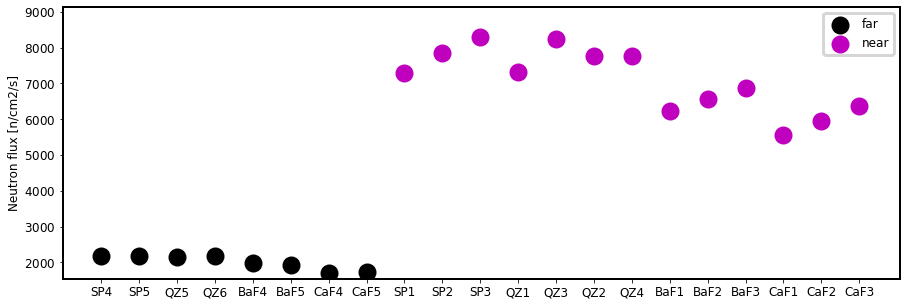

In [9]:
plt.figure(figsize=(15, 5))
for where, data in sim.groupby("position"):
    x, y = data.crystal, data.n_flux
    plt.scatter(x, y, label=where)
    print(f"Mean | std neutron flux in {where:<4}: {y.mean():.1f} | {y.std():>6.1f} n/cm2/s")
    print(f"Min  | max neutron flux in {where:<4}: {y.min ():.1f} | {y.max():>6.1f} n/cm2/s")

plt.legend()
set_ylimits(sim.n_flux)
plt.ylabel("Neutron flux [n/cm2/s]")

# $\gamma$ energy flux

Mean | std EM energy flux in far : 22.0 |    2.2 MeV/cm2/s
Min  | max EM energy flux in far : 19.4 |   26.3 MeV/cm2/s
Mean | std EM energy flux in near: 25.9 |    2.6 MeV/cm2/s
Min  | max EM energy flux in near: 21.7 |   30.2 MeV/cm2/s


Text(0, 0.5, 'EM energy flux [MeV/cm2/s]')

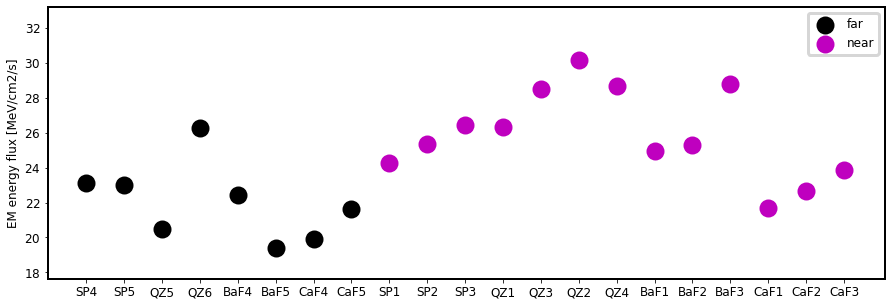

In [10]:
plt.figure(figsize=(15, 5))
for where, data in sim.groupby("position"):
    x, y = data.crystal, data.em_eflux
    plt.scatter(x, y, label=where)
    print(f"Mean | std EM energy flux in {where:<4}: {y.mean():.1f} | {y.std():>6.1f} MeV/cm2/s")
    print(f"Min  | max EM energy flux in {where:<4}: {y.min ():.1f} | {y.max():>6.1f} MeV/cm2/s")
    
plt.legend()
set_ylimits(sim.em_eflux)
plt.ylabel("EM energy flux [MeV/cm2/s]")

Mean | std n/EM flux in far : 0.3 |    0.0 n/MeV
Min  | max n/EM flux in far : 0.3 |    0.4 n/MeV
Mean | std n/EM flux in near: 0.9 |    0.1 n/MeV
Min  | max n/EM flux in near: 0.8 |    1.0 n/MeV


Text(0, 0.5, 'EM energy flux [n/MeV/300]')

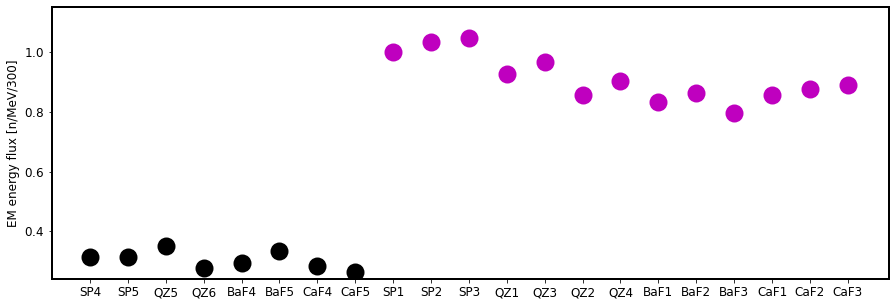

In [11]:
plt.figure(figsize=(15, 5))
for where, data in sim.groupby("position"):
    x, y = data.crystal, data.ng_ratio
    plt.scatter(x, y)
    print(f"Mean | std n/EM flux in {where:<4}: {y.mean():.1f} | {y.std():>6.1f} n/MeV")
    print(f"Min  | max n/EM flux in {where:<4}: {y.min ():.1f} | {y.max():>6.1f} n/MeV")
    
set_ylimits(sim.ng_ratio)
plt.ylabel("EM energy flux [n/MeV/300]")

# EM dose comparison

In [12]:
# San Francisco (doses in mGy, time in h)
sf_Cf_gamma , sf_Cf_gamma_u , sf_Cf_gamma_t  = 2.90, 0.75, 64.3 * 3600
sf_Co_short , sf_Co_short_u , sf_Co_short_t  =   90,   15,  1   * 3600
sf_Co_medium, sf_Co_medium_u, sf_Co_medium_t =  270,   41,  3   * 3600
sf_Co_long  , sf_Co_long_u  , sf_Co_long_t   = 1600,  240, 17.8 * 3600

sf_gamma_dose     = [sf_Cf_gamma  , sf_Co_short  , sf_Co_medium  , sf_Co_long  ]
sf_gamma_dose_u   = [sf_Cf_gamma_u, sf_Co_short_u, sf_Co_medium_u, sf_Co_long_u]
sf_gamma_exposure = [sf_Cf_gamma_t, sf_Co_short_t, sf_Co_medium_t, sf_Co_long_t]

In [13]:
# Californication
caf_em_dose_short = sim.em_dose * 1.602176462e-7 * Cf_t_activity * short_exposure * 1e3 # mGy
caf_em_dose_long  = sim.em_dose * 1.602176462e-7 * Cf_t_activity *  long_exposure * 1e3 # mGy

In [14]:
plt.rcParams["font.size"] = 20

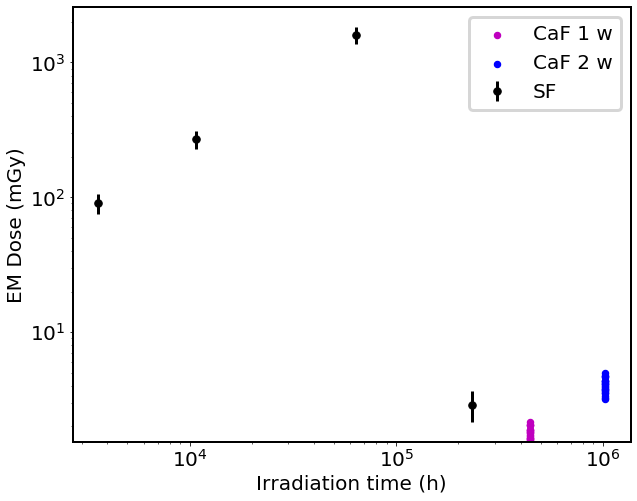

In [15]:
plt.errorbar(sf_gamma_exposure, sf_gamma_dose, sf_gamma_dose_u                 , fmt=".k"  , label="SF"     )
plt.scatter (np.full_like(caf_em_dose_short, short_exposure), caf_em_dose_short, s=20, c="m", label="CaF 1 w")
plt.scatter (np.full_like(caf_em_dose_long ,  long_exposure), caf_em_dose_long , s=20, c="b", label="CaF 2 w")

plt.legend()
plt.xlabel("Irradiation time (h)")
plt.ylabel("EM Dose (mGy)")
plt.xscale("log")
plt.yscale("log")

# Neutron fluence comparison

In [16]:
sf_n_fluences  = 3.8e4 * sf_Cf_gamma_t, 8e4 * sf_Cf_gamma_t # n/cm2
sf_n_fluence   = np.mean(sf_n_fluences)
sf_n_fluence_u = np.max (sf_n_fluences) - sf_n_fluence

Text(0.5, 0, 'n fluence (n/cm2)')

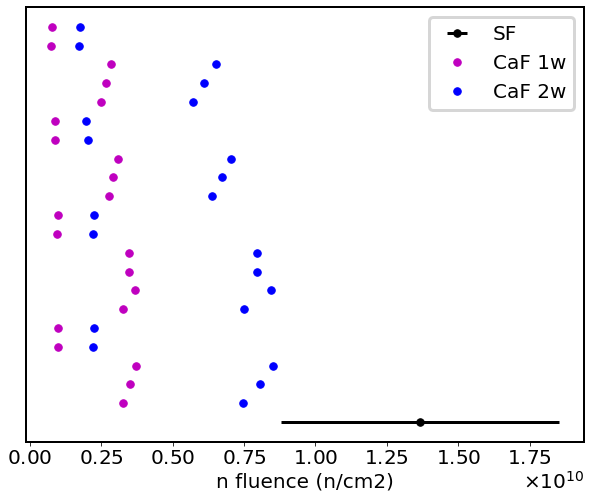

In [17]:
plt.errorbar(sf_n_fluence       ,                       0, None, sf_n_fluence_u, fmt=".k", label="SF"    )
plt.errorbar(sim.n_fluence_short, np.arange(len(sim)) + 1,                       fmt=".m", label="CaF 1w")
plt.errorbar(sim.n_fluence_long , np.arange(len(sim)) + 1,                       fmt=".b", label="CaF 2w")

plt.yticks([])
plt.legend()

plt.xlabel("n fluence (n/cm2)")